#  Team: Python rangers

## Members: Bhuvana, Madhu, Mahitha

### Step 1: Install prequisites

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


### Step 2: Import required libraries

In [109]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sn
from sklearn import preprocessing
from datetime import date, timedelta
import re
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
from sqlalchemy import create_engine
import pymysql
# disable warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Step 3: Reading the input excel sheets in to dataframes

In [8]:
xls = pd.ExcelFile('HospitalDatabase.xlsx')

# Dataframes of each sheet in the excel file. 
# We use the same variables wherever necessary instead of creating dataframes again and again

patients_df = pd.read_excel(xls, 'Patients')
visits_df = pd.read_excel(xls, 'EDVisits')
Ambvisits_df = pd.read_excel(xls, 'AmbulatoryVisits') 
readmit_df = pd.read_excel(xls, 'ReAdmissionRegistry')
discharge_df = pd.read_excel(xls, 'Discharges')
provider_df = pd.read_excel(xls, 'Providers')
edunique_df =  pd.read_excel(xls, 'EDUnique')

### Solutions

#### Q1: Make a pair plot on Readmission Registry table & do u see any correlation between columns values.

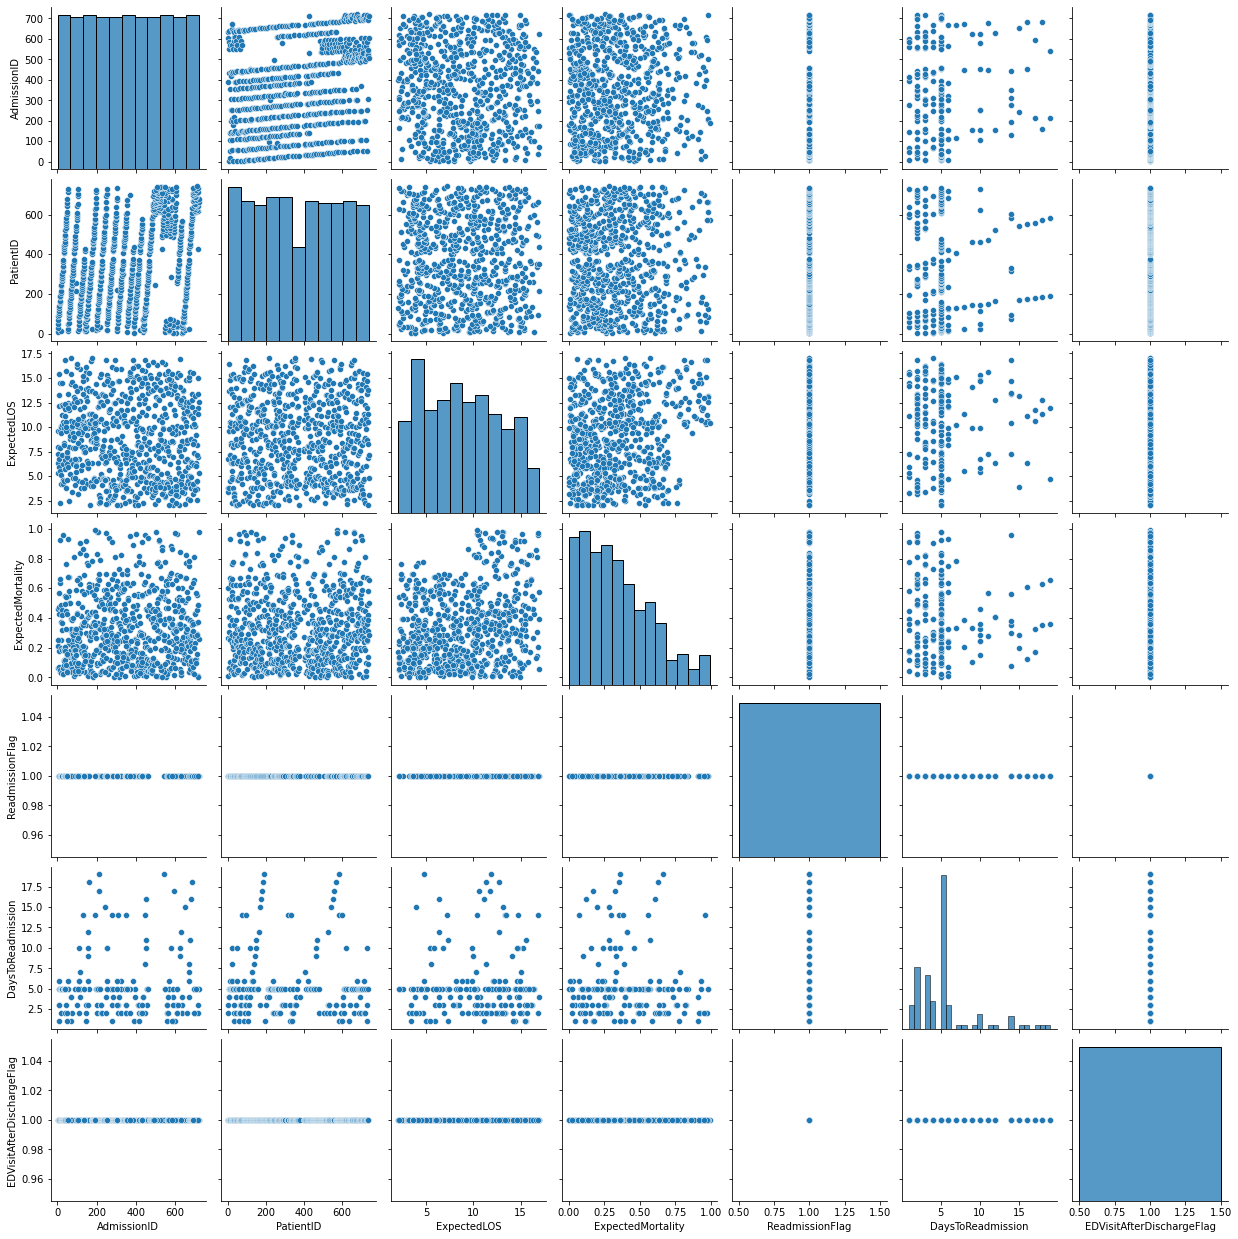

In [9]:
sn.pairplot(readmit_df)

# expected length of stay and expected mortality have correlation and it is linear relation

#### Q2:Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200

In [10]:
patients_df.iloc[101 : 200,1:3]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
195,Cathlene,Kidwell
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun


#### Q3:"Create a figure object called fig using plt.figure() ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** Plot (x,y) on that axes and set the labels and titles to match the plot below:**"

Text(0.5, 1.0, 'fig')

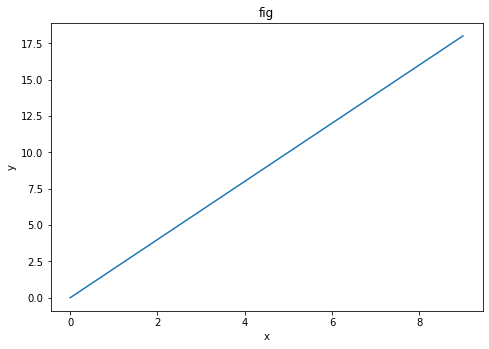

In [11]:
x = np.arange(0,10)
y = x*2

%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('fig')

#### Q4: Display Data By splitting age in 4 quartiles and labeling the quartiles

In [12]:
# Step 1: convert datetime column to just date
#patients_df['DateOfBirth'] = pd.to_datetime(patients_df['DateOfBirth']).dt.date

# Step 2: Calculate age(This function converts given date to age)
def age(bdate):
    today = date.today()
    return today.year - bdate.year - ((today.month, 
                                      today.day) < (bdate.month, 
                                                    bdate.day))
  
#patients_df['Age'] = patients_df['DateOfBirth'].apply(age)
patients_df['Age'] = pd.to_datetime(patients_df['DateOfBirth']).dt.date.apply(age)

# display the dataframe with new age column

#Step 3: find the unique values
patients_df.Age.unique()

# Step 4: Split the records in to quartiles
bins = [35,40,50,60,70]
labels = ['Below 40','Below 50','Below 60','Below 70']
patients_df['AgeGroup'] = pd.cut(patients_df['Age'], bins=bins, labels=labels, right=False)
display(patients_df)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62,Below 70
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36,Below 40
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46,Below 50
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53,Below 60
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60,Below 70
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,35,Below 40
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,51,Below 60
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39,Below 40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,58,Below 60


#### Q5 : Display full name of patients who are born in 1986

In [13]:
df_1986 = patients_df
df_1986['year'] = df_1986['DateOfBirth'].dt.year # extracting year from date of birth
# applied condition for year and combined name
names = (df_1986['FirstName'] +' '+ df_1986 ['LastName']).where (df_1986['year'] == 1986) 
names.dropna()


23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
dtype: object

#### Q6:Create a jointplot on expected mortality & expected length of stay

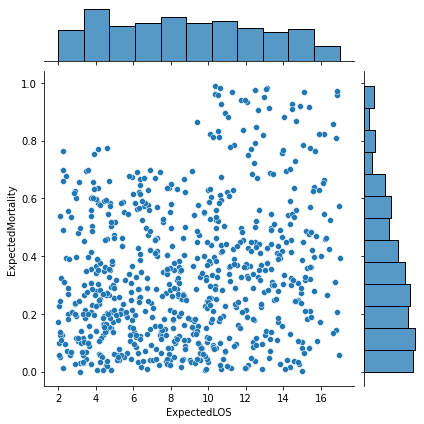

In [14]:
sn.jointplot(x="ExpectedLOS", y="ExpectedMortality", data = discharge_df)

#### Q7 : Create a pair plot by taking parameter "hue" as EDDisposition

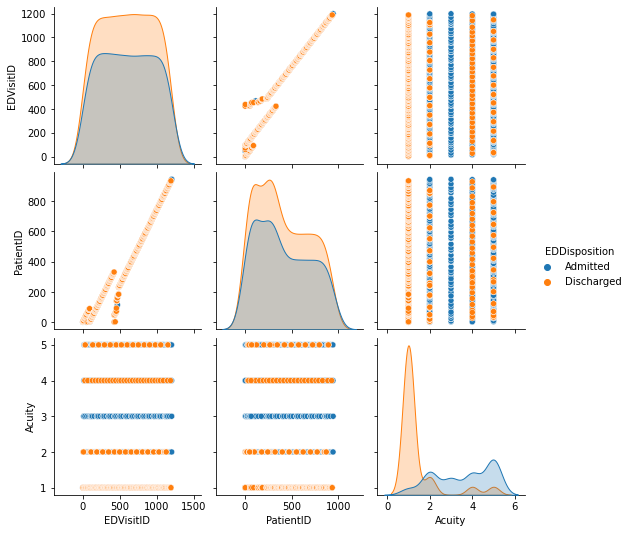

In [15]:
sn.pairplot(visits_df, hue='EDDisposition')

#### Q8 : Create a bar chart between expectedLOS & Primary diagnosis


<AxesSubplot:xlabel='ExpectedLOS', ylabel='PrimaryDiagnosis'>

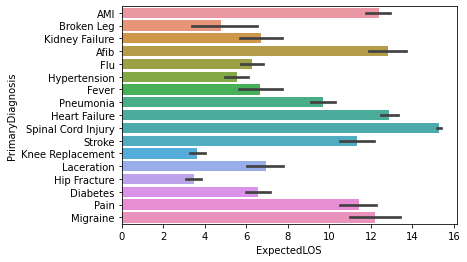

In [16]:
sn.barplot(x='ExpectedLOS',y='PrimaryDiagnosis',  data=discharge_df)

#### Q9:Get the list of patient ids which are not there in ReadmissionRegistry

In [17]:
df = readmit_df
df1 = patients_df 
df1['no_readmit'] = ~df1.PatientID.isin(df.PatientID)
no_readmit = df1['PatientID'].where(df1['no_readmit']== True).dropna().astype(int)
no_readmit.unique()

array([  4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382,
       383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743,
       744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756,
       757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769,
       770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782,
       783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795,
       796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808,
       809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821,
       822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834,
       835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847,
       848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860,
       861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873,
       874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 88

#### Q10:Create a boxplot on ExpectedLOS by taking service into account

<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

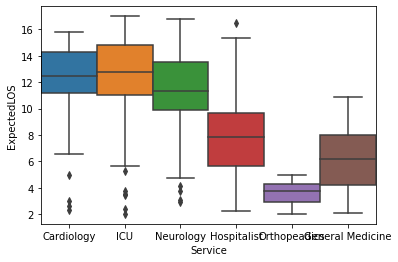

In [18]:
sn.boxplot(x='Service', y='ExpectedLOS', data=discharge_df, width = 1.0)

#### Q11: Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] & EcpectedLOS=[10,5,7,9] &explode the wedge with highest LOS

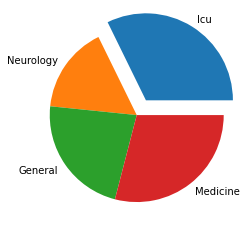

In [19]:
ExLOS = np.array([10,5,7,9])
Service= ["Icu", "Neurology", "General", "Medicine"]
explod = [0.2, 0, 0, 0]

plt.pie(ExLOS, labels = Service, explode = explod)
plt.show() 

#### Q12:Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T

In [20]:
# Credentials to database connection
host ="localhost",
user ="autouser",
passwd ="autouser1234",
database = "hospital_db"
# Create dataframe
df = provider_df

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{passwd}@{host}/{database}".
                       format(host="localhost", database = "hospital_db", user="autouser", passwd="autouser1234"))

# Convert dataframe to sql table                                   
df.to_sql('newproviders', engine,if_exists ='replace', index=False)
# Connect to the database
connection = pymysql.connect(host='localhost',
                         user='autouser',
                         passwd='autouser1234',
                         database='hospital_db') 
# create cursor
cursor=connection.cursor()
  
# Execute query
sql = "SELECT * FROM newproviders WHERE ProviderName LIKE 'T%';"
cursor.execute(sql)

# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

engine.dispose()
connection.close()

(4, 'Ted Texas', 'Pediatrics', datetime.datetime(1993, 12, 23, 21, 33, 52))
(8, 'Ted Green', 'Pediatrics', datetime.datetime(1996, 5, 30, 6, 14, 53))
(9, 'Ted Black', 'Pediatrics', datetime.datetime(1997, 2, 20, 8, 1, 10))
(19, 'Tyler Conner', 'Cardiology', datetime.datetime(2003, 7, 9, 2, 41, 40))
(34, 'Tony Creed', 'PrimaryCare', datetime.datetime(2010, 4, 28, 14, 11, 27))
(37, 'Trent Tye', 'PrimaryCare', datetime.datetime(2013, 1, 12, 15, 32, 21))


#### Q13: Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

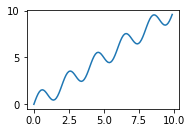

In [21]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

plt.subplot(2, 2,1)
plt.plot(x,y)

#### Q14:Find the number of null values in BloodPressureSystolic column


In [22]:
Ambvisits_df["BloodPressureSystolic"].isna().sum()

124

#### Q15 : Replace all the null values in ReadmissionFlag with 0

In [23]:
readmit_df['ReadmissionFlag'] = readmit_df['ReadmissionFlag'].fillna(0)
display(readmit_df) #replaced NaN with 0 for ReadmissionFlag

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


#### Q16 :Plot a graph to show the distribution of expected length of stay

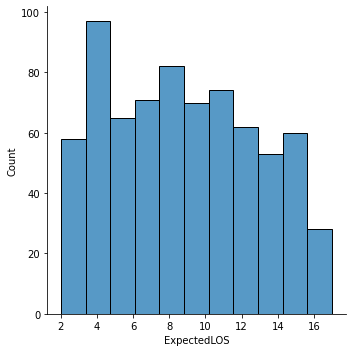

In [24]:
sn.displot(discharge_df.ExpectedLOS)

#### Q17 : Create a heat map to show the correlation between the column values of Edvisits

<AxesSubplot:>

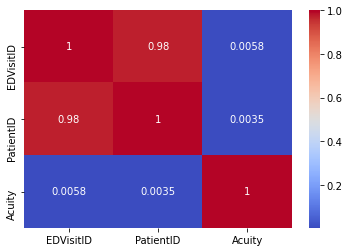

In [25]:
sn.heatmap(visits_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# Heatmap ignores the non numeric columns, so the below heatmap shows the correlation between numeric columns in Edvisits

#### Q18 :Add column 'Age' in Patient table


In [26]:
def age(bdate):
    today = date.today()
    return today.year - bdate.year - ((today.month, 
                                      today.day) < (bdate.month, 
                                                    bdate.day))
  
patients_df['Age'] = patients_df['DateOfBirth'].apply(age)
patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup,year,no_readmit
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62,Below 70,1960,False
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36,Below 40,1985,False
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46,Below 50,1976,False
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53,Below 60,1968,True
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60,Below 70,1962,False
...,...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,35,Below 40,1986,True
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,51,Below 60,1970,True
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39,Below 40,1983,True
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,58,Below 60,1963,True


#### Q19 : Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

In [27]:
df_new = pd.DataFrame()
df_new[["Date","Time"]] = readmit_df["DischargeDate"].astype(str).str.split(expand=True)
display(df_new)

,Date,Time
0,2018-01-04,19:59:31.391
1,2018-01-04,21:28:51.898
2,2018-01-04,22:28:23.672
3,2018-01-05,05:47:04.933
4,2018-01-05,14:18:30.029
...,...,...
715,2018-03-07,21:22:10.061
716,2018-03-08,02:43:18.749
717,2018-03-08,09:27:18.377
718,2018-03-10,06:06:12.068


#### Q20 : Count of number of patients admitted based on Primary Diagnosis and Service provided

In [28]:
patientadm_df = readmit_df[['PatientID','PrimaryDiagnosis', 'Service']].groupby(['PrimaryDiagnosis','Service']).count()
patientadm_df = patientadm_df.rename(columns={'PatientID': 'No.of Patients'})
display(patientadm_df)

No.of Patients
PrimaryDiagnosis   Service                         
AMI                Cardiology                    40
                   Hospitalist                    1
                   ICU                            5
                   Neurology                      2
Afib               Cardiology                    10
                   ICU                            1
Broken Leg         Cardiology                     3
                   General Medicine               3
                   Hospitalist                    3
Diabetes           General Medicine              38
                   Hospitalist                   26
Fever              General Medicine              13
                   Hospitalist                    3
                   ICU                            3
Flu                Cardiology                     2
                   General Medicine              54
                   Hospitalist                   19
                   ICU                            3
                   Neurology                      2
Heart Failure      Cardiology                    39
                   ICU                           33
                   Neurology                      6
Hip Fracture       Orthopeadics                  23
Hypertension       General Medicine              35
                   Hospitalist                    6
                   ICU                            4
                   Neurology                      5
Kidney Failure     Cardiology                     1
                   General Medicine              12
                   Hospitalist                    6
                   ICU                            1
Knee Replacement   Hospitalist                    1
                   Orthopeadics                  22
Laceration         General Medicine              21
                   Hospitalist                    7
                   ICU                            1
Migraine           Neurology                     12
Pain               Neurology                      7
Pneumonia          General Medicine              67
                   Hospitalist                   28
                   ICU                           77
                   Neurology                      5
Spinal Cord Injury ICU                            2
Stroke             General Medicine              20
                   Hospitalist                    1
                   ICU                           21
                   Neurology                     26

#### Q21:Which demographic patients are prone to get stroke

##### According to this data gender wise female , race wise black african americans and age wise above 60 are more prone to get stroke.

In [29]:
le = preprocessing.LabelEncoder()
df3 = discharge_df
df3['PrimaryDiagnosis'] = le.fit_transform(df3['PrimaryDiagnosis'])
# merging demographic data and discharge data
result = pd.merge(patients_df, df3, on = 'PatientID')
new_result = result.drop(['AdmissionID','DischargeDate','DischargeDisposition',
             'Service','ExpectedLOS','ExpectedMortality','FirstName','LastName','Language'],axis = 1)

In [30]:
# extracting age from date of birth 
new_result['Age'] = (new_result['AdmissionDate'] - new_result['DateOfBirth']) // timedelta(days=365.2425)

In [31]:
#filtering people whose primary diagnosis is stroke
stroke_data = new_result[new_result['PrimaryDiagnosis'] == 16]

In [32]:
bins = [30,35,40,50,60]
labels = ['above 30','above 40','above 50','above 60']
stroke_data['AgeGroup'] = pd.cut(stroke_data['Age'], bins=bins, labels=labels, right=False)

In [33]:
#getting gender data
gender_data = stroke_data.groupby(by = ['Gender']).count()
gender_data.drop(['PatientID','DateOfBirth','Race','AdmissionDate','Age','AgeGroup'],axis = 1)

,year,no_readmit,PrimaryDiagnosis
Gender,,,
Female,36,36,36
Male,32,32,32


In [34]:
print("The gender prone to get stroke is :")
print(gender_data.idxmax().loc[gender_data.max().idxmax()])

The gender prone to get stroke is :
Female


In [35]:
#getting race data
race_data = stroke_data.groupby(by = ['Race']).count()
race_data.drop(['PatientID','DateOfBirth','Gender','AdmissionDate','Age','AgeGroup'],axis = 1)

,year,no_readmit,PrimaryDiagnosis
Race,,,
Black/African-American,40,40,40
White,28,28,28


In [36]:
print("The race prone to get stroke is :")
print(race_data.idxmax().loc[race_data.max().idxmax()])

The race prone to get stroke is :
Black/African-American


In [37]:
#getting age group data
agegroup_data = stroke_data.groupby(by = ['AgeGroup']).count()
agegroup_data.drop(['PatientID','DateOfBirth','Gender','Race','AdmissionDate','Age'],axis = 1)

,year,no_readmit,PrimaryDiagnosis
AgeGroup,,,
above 30,10,10,10
above 40,12,12,12
above 50,22,22,22
above 60,24,24,24


In [38]:
print("The age prone to get stroke is :")
print(agegroup_data.idxmax().loc[agegroup_data.max().idxmax()])

The age prone to get stroke is :
above 60


#### Q22: Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value

In [39]:
ed_visits = visits_df
ed_visits=ed_visits[["Acuity","EDDisposition"]]
ed_visits.value_counts()

Acuity  EDDisposition
1       Discharged       558
5       Admitted         179
2       Admitted         116
4       Admitted         107
3       Admitted          81
2       Discharged        66
1       Admitted          32
5       Discharged        30
4       Discharged        30
dtype: int64

#### Q23 : Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list)

In [40]:
lst = []
n = int(input("Enter number of elements : "))
for i in range(0, n):
    ele = int(input())
    lst.append(ele)  
print(lst)
if len(lst) % 2 != 0 :
    print("Center element is ",lst[int(len(lst)/2)])
else:
    print("Center elements are ",(lst[int(((len(lst))-1)/2)],lst[int(len(lst)/2)]))

Enter number of elements : 5
11
22
33
44
55
[11, 22, 33, 44, 55]
Center element is  33


#### Q24 : Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

In [41]:
patientcount_df = visits_df[['PatientID','ReasonForVisit', 'EDDisposition']].groupby(['ReasonForVisit', 'EDDisposition']).count()
patientcount_df = patientcount_df.unstack()
patientcount_df.fillna(0, inplace=True)
patientcount_df.columns = patientcount_df.columns.get_level_values(1)
display(patientcount_df)

EDDisposition,Admitted,Discharged
ReasonForVisit,,
Accident,39.0,0.0
Bleeding,16.0,15.0
Car Accident,17.0,0.0
Chest Pain,94.0,15.0
Cough,0.0,1.0
Fever,46.0,188.0
Gun Shot,16.0,0.0
Intoxication,0.0,30.0
Laceration,0.0,30.0


#### Q25 :Plot a graph by counting the no. of patients in each department

Text(0, 0.5, 'DepartmentID')

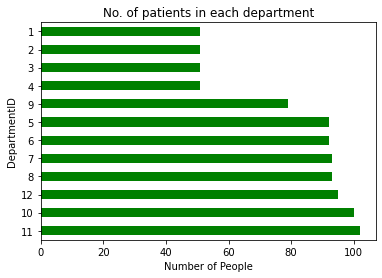

In [42]:
Countpatients = pd.value_counts(Ambvisits_df['VisitDepartmentID'].values, sort=True)

Countpatients.plot.barh(title='No. of patients in each department', color='green')
plt.xlabel('Number of People')
plt.ylabel('DepartmentID')


#### Q26 : Using Arrays and Loops, find the count of of patients based on gender

In [43]:
male_patients = 0
female_patients = 0

for index, row in patients_df.iterrows():
    if(row["Gender"]=='Male'):
        male_patients = male_patients + 1
    else:
        female_patients = female_patients + 1
        
print('No. of Male Patients:' , male_patients)
print('No. of Female Patients:' , female_patients)

No. of Male Patients: 537
No. of Female Patients: 408


#### Q27: Plot a graph to count the patients based on discharge disposition

                      PatientID
DischargeDisposition           
Expired                     104
Home                        577
Transfer                     39


Text(0, 0.5, 'Discharge Disposition')

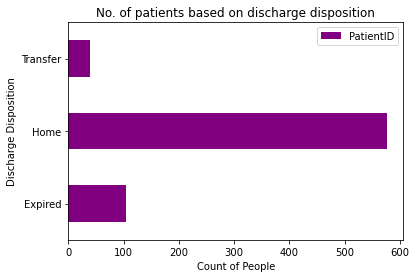

In [44]:
patientcnt_df = discharge_df[['PatientID','DischargeDisposition']].groupby(['DischargeDisposition']).count()
print(patientcnt_df)
patientcnt_df.plot.barh(title='No. of patients based on discharge disposition', color='purple')
plt.xlabel('Count of People')
plt.ylabel('Discharge Disposition')

#### Q28 : Which reason of visit has maximum mortality rate

In [45]:
max_value = discharge_df["ExpectedMortality"]. max()
print('\n')
print('max mortality rate : ', max_value) # find the max mortality rate
pid = discharge_df[discharge_df.ExpectedMortality == max_value]
display(pid) #find the row with max mortality rate

# with the patientid find the reasonofvisit with high mortality from EDvisits
 
df_common = visits_df.loc[visits_df['PatientID'].isin(pid['PatientID'])]
print('\n')
print('The reason of visit that has maximum mortality rate is :', df_common.ReasonForVisit)



max mortality rate :  0.9899452598970535


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
88,190,572,2018-02-14,2018-02-25 13:02:30.113,Expired,Neurology,14,10.372029,0.989945




The reason of visit that has maximum mortality rate is : 353    Pneumonia
Name: ReasonForVisit, dtype: object


#### Q29:Calculate average LOS

In [46]:
# average of expected los from discharges sheet
discharge_df['ExpectedLOS'].mean()

8.82458915915616

In [47]:
# average of expected los from Readmission registry sheet
readmit_df['ExpectedLOS'].mean()

8.824589159156156

#### Q30 : Which patientid has most entries in readmission registry

In [48]:
print("The Patient Id with most entries in readmission registry is ",readmit_df['PatientID'].value_counts().idxmax())

The Patient Id with most entries in readmission registry is  23


#### Q31:Find count of White Spanish Male

In [49]:
print("The count of White Spanish Male is ",len(patients_df.loc[(patients_df['Language'] == 'Spanish') & 
                                                        (patients_df['Gender'] == 'Male') & 
                                                        (patients_df['Race']== 'White')]))

The count of White Spanish Male is  15


#### Q32 : Write a function to print the table of the given number

In [50]:
number = int(input("Enter the number: "))
for count in range(1, 11):
    print(number, 'x', count, '=', number * count)

Enter the number: 11
11 x 1 = 11
11 x 2 = 22
11 x 3 = 33
11 x 4 = 44
11 x 5 = 55
11 x 6 = 66
11 x 7 = 77
11 x 8 = 88
11 x 9 = 99
11 x 10 = 110


#### Q33 : Using a bar chart, which Service had the lowest count of Expected Mortality?

                  ExpectedMortality
Service                            
Cardiology                 0.267605
General Medicine           0.271582
Hospitalist                0.319124
ICU                        0.457278
Neurology                  0.473460
Orthopeadics               0.322251


Service with lowest Expected Mortality is : Cardiology


Text(0, 0.5, 'ExpectedMortality')

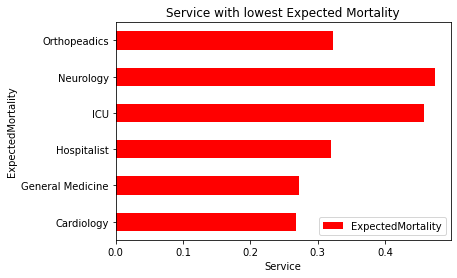

In [51]:
mortality_df = discharge_df[['ExpectedMortality','Service']].groupby(['Service']).mean()
print(mortality_df)
minValueIndexObj = mortality_df.idxmin().loc[mortality_df.min().idxmin()]
print('\n')
print('Service with lowest Expected Mortality is :', minValueIndexObj )
mortality_df.plot.barh(title='Service with lowest Expected Mortality', color='red')
plt.xlabel('Service')
plt.ylabel('ExpectedMortality')

#### Q34 : np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [52]:
x = np.arange(1,31).reshape(6,5)
x[2:4,0:2]

array([[11, 12],
       [16, 17]])

#### Q35 : np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20

In [53]:
y = np.arange(1,31).reshape(6,5)
np.diagonal(y[0:4,1:5])

array([ 2,  8, 14, 20])

#### Q36 : Create a correlation matrix on EDVisits

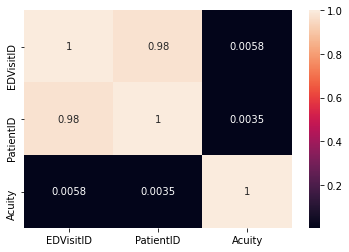

In [54]:
corrMatrix = visits_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### Q37 : Write a function to print all the upper case letter of a given sentence

In [55]:
sentence = "Numpy Ninja HAcKathon"
caps = list(filter(lambda c: c.isupper(), sentence)) 
print("The uppercase characters in are : " ,caps)

The uppercase characters in are :  ['N', 'N', 'H', 'A', 'K']


#### Q38 : Number of patients on 'Transfer' based on primary diagnosis

Number of patients on Transfer based on primary diagnosis

16    9
6     9
14    8
3     7
5     2
13    1
11    1
10    1
1     1
dtype: int64


Text(0, 0.5, 'Number of People')

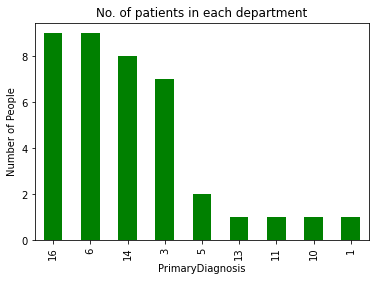

In [56]:
trans_df = discharge_df.loc[discharge_df['DischargeDisposition'] == 'Transfer']

Cntpatients = pd.value_counts(trans_df['PrimaryDiagnosis'].values, sort=True)
print('Number of patients on Transfer based on primary diagnosis\n')
print(Cntpatients)
Cntpatients.plot.bar(title='No. of patients in each department', color='green')
plt.xlabel('PrimaryDiagnosis')
plt.ylabel('Number of People')

#### Q39 : Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine.Use EDUnique Sheet for reason for visit

In [57]:
df1 = patients_df
df5 = edunique_df
Migraine_df = pd.merge(df1, df5, on = 'PatientID')
Migraine_df1 = Migraine_df.loc[Migraine_df['ReasonForVisit'] == 'Migraine']
Migraine_df1[['FirstName','LastName','DateOfBirth','ReasonForVisit']]

,FirstName,LastName,DateOfBirth,ReasonForVisit
1,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


#### Q40 : Plot a graph showing the count of patients for the reason visited the hospital.

                     PatientID
ReasonForVisit                
Accident                    39
Bleeding                    31
Car Accident                17
Chest Pain                 109
Cough                        1
Fever                      234
Gun Shot                    16
Intoxication                30
Laceration                  30
Migraine                   156
Pneumonia                  201
Shortness of Breath        149
Stomach Ache               186


<AxesSubplot:xlabel='ReasonForVisit'>

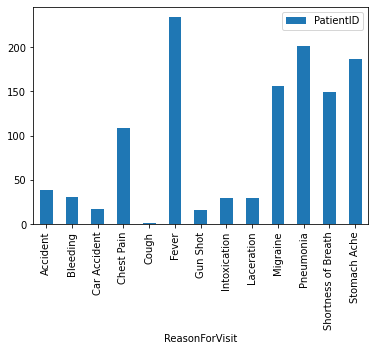

In [58]:
count_df = visits_df[['PatientID','ReasonForVisit']].groupby(['ReasonForVisit']).count()
print(count_df)
count_df.plot(kind='bar')

#### Q41 : Find the visit type with maximum 'No Show'

In [59]:
vst_df = Ambvisits_df.loc[Ambvisits_df['VisitStatus'] == 'No Show']
Cnt = vst_df[['VisitType','VisitStatus']].groupby(['VisitType']).count()
max_type = Cnt.idxmax().loc[Cnt.max().idxmax()]

print('The visit type with maximum ''No Show'' status is: ', max_type)


The visit type with maximum No Show status is:  Telemedicine


#### Q42 : Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery

In [60]:
dfnew=provider_df.loc[((provider_df['ProviderID'] > 11) & (provider_df['ProviderID'] < 20)) 
                      & (provider_df['ProviderSpecialty'] == 'Surgery')]
print('Details of the providers with providerId  between 11 and 20 and with ProviderSpecialty as Surgery')
display(dfnew)

Details of the providers with providerId  between 11 and 20 and with ProviderSpecialty as Surgery


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


#### Q43 : Write a regular expression to find all the digits and numbers in the string

In [61]:
def findNumbers(str):
    array = re.findall(r'[0-9]+', str)
    return array
  
str = "a1b2c3e4d5e6f7g8h9"
array = findNumbers(str)
print(*array)

1 2 3 4 5 6 7 8 9


#### Q44 : Create a pivot table displaying average LOS based on Service and Primary Diagnosis

In [62]:
tbl = pd.pivot_table(data=discharge_df, 
                        index=['Service'], 
                        columns=['PrimaryDiagnosis'], 
                        values='ExpectedLOS',
                        aggfunc='mean')
# since there were Nan values for few cells, replacing as Nan values with 0
tbl.fillna(0, inplace=True)
display(tbl)

PrimaryDiagnosis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Service,,,,,,,,,,,,,,,,,
Cardiology,12.414202,13.162920,3.911826,0.000000,0.000000,3.970428,13.014044,0.000000,0.000000,6.580273,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
General Medicine,0.000000,0.000000,3.368132,5.665298,6.803796,6.141753,0.000000,0.000000,5.369365,5.943163,0.000000,6.771154,0.000000,0.000000,6.140270,0.00000,7.173333
Hospitalist,13.828290,0.000000,7.125069,7.874359,8.865651,7.033979,0.000000,0.000000,7.864913,7.850346,2.255705,7.069360,0.000000,0.000000,8.146240,0.00000,15.349671
ICU,12.503213,9.651522,0.000000,0.000000,3.860693,4.953871,12.784620,0.000000,5.092533,9.045995,0.000000,10.101443,0.000000,0.000000,13.523626,15.27654,13.297978
Neurology,10.482847,0.000000,0.000000,0.000000,0.000000,6.700593,12.737565,0.000000,4.276454,0.000000,0.000000,0.000000,12.202213,11.441453,7.527330,0.00000,12.745608
Orthopeadics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.474971,0.000000,0.000000,3.702839,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


#### Q45 : Calculate mortality by diagnosis

In [63]:
mortal_df = discharge_df.groupby('PrimaryDiagnosis')['ExpectedMortality'].sum() 
display(mortal_df)

PrimaryDiagnosis
0     11.287028
1      3.346590
2      2.478958
3     18.334439
4      5.635418
5     21.838083
6     30.082879
7      8.586140
8     14.827774
9      4.951837
10     6.678844
11     7.917630
12     6.808469
13     3.837848
14    66.307360
15     0.400558
16    30.085412
Name: ExpectedMortality, dtype: float64

#### Q46 : Write a code to split a sentence into words using regex

In [64]:
sentence = 'This is numpyninja hackathon'
words = re.split(' ',sentence)
words

['This', 'is', 'numpyninja', 'hackathon']

#### Q47 : Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic

In [65]:
df4 = Ambvisits_df
# filtering max bps records
max_bp = df4.loc[df4.BloodPressureSystolic == df4.BloodPressureSystolic.max()]
#printing only 1 row
max_bp.iloc[1]

VisitID                                          888
PatientMRN                                       906
ProviderID                                        24
DateofVisit                      2019-03-31 00:00:00
DateScheduled             2019-03-17 23:21:17.361000
VisitDepartmentID                                 10
VisitType                                        New
BloodPressureSystolic                            190
BloodPressureDiastolic                       137.208
Pulse                                        52.6669
VisitStatus                                Completed
Name: 251, dtype: object

#### Q48 : Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)

In [66]:
avglos_df = discharge_df[['ExpectedLOS','DischargeDisposition','Service']].groupby(['DischargeDisposition','Service']).mean()
display(avglos_df)

ExpectedLOS
DischargeDisposition Service                      
Expired              Cardiology           9.202626
                     General Medicine     5.874003
                     Hospitalist          6.775636
                     ICU                  9.919063
                     Neurology            9.384312
                     Orthopeadics         3.943883
Home                 Cardiology          12.864936
                     General Medicine     6.105696
                     Hospitalist          8.009046
                     ICU                 13.451158
                     Neurology           12.538859
                     Orthopeadics         3.508337
Transfer             Cardiology          11.818403
                     General Medicine     6.116124
                     Hospitalist          5.701389
                     ICU                 11.989238
                     Neurology           11.469198
                     Orthopeadics         4.842255

#### Q49:Create a jointplot between expected mortality & expected length of stay

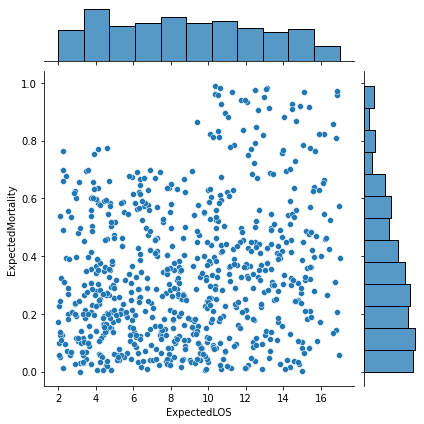

In [67]:
sn.jointplot(x="ExpectedLOS", y="ExpectedMortality", data = discharge_df)

#### Q50 : Which departmentID has maximum number of visits scheduled.

In [68]:
print('Department with maximum number of visits scheduled is ',Ambvisits_df['VisitDepartmentID'].value_counts().idxmax())

Department with maximum number of visits scheduled is  11


#### Q51:Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [69]:
visits_df [(visits_df .ReasonForVisit =='Migraine' ) | (visits_df .ReasonForVisit =='Pneumonia') 
               & (visits_df .Acuity>=2)]


,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1162,1124,870,2020-01-14 15:31:20.038,2020-01-15 10:28:29.406,2,Migraine,Discharged
1175,1151,897,2020-01-15 00:24:27.036,2020-01-15 02:11:30.139,1,Migraine,Discharged
1182,1162,908,2020-01-15 03:20:10.313,2020-01-15 05:12:01.600,1,Migraine,Discharged
1184,1164,910,2020-01-15 04:02:21.645,2020-01-15 19:45:03.534,1,Migraine,Discharged


#### Q52 : Retrieve the row with minimum DBP using sorting technique

In [70]:
rslt_df = Ambvisits_df.sort_values(by = 'BloodPressureDiastolic', na_position="first")
# get the row of minimum value
print(rslt_df.loc[rslt_df['BloodPressureDiastolic'].idxmin()])

VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.181000
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                            120
BloodPressureDiastolic                       51.6957
Pulse                                        53.3105
VisitStatus                                Completed
Name: 757, dtype: object


#### Q53 :Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

In [71]:
name = input("ReasonForVisit: ")
no_patients=visits_df .query('ReasonForVisit == @name')
no_patients.ReasonForVisit.count()

ReasonForVisit: Fever


234

#### Q54 : Mortality O/E

In [72]:
le = preprocessing.LabelEncoder()
df3 = discharge_df
df3['DischargeDisposition'].unique()
df3['DischargeDisposition'] = le.fit_transform(df3['DischargeDisposition'])
df3['DischargeDisposition'].unique()
mortality_df = df3.where (df3['DischargeDisposition'] == 0)
mortality_df.dropna()
mortality_df['ExpectedMortality'].sum()/(mortality_df['ExpectedMortality'].count())
mortality_oe_ratio = mortality_df['DischargeDisposition'].count()/mortality_df['ExpectedMortality'].sum()/(mortality_df['ExpectedMortality'].count())
print('The mortality ratio of observed and expected is : ', mortality_oe_ratio)

The mortality ratio of observed and expected is :  0.02869702055128477


#### Q55: Create a bar chart on service & expected length of stay

<AxesSubplot:xlabel='ExpectedLOS', ylabel='Service'>

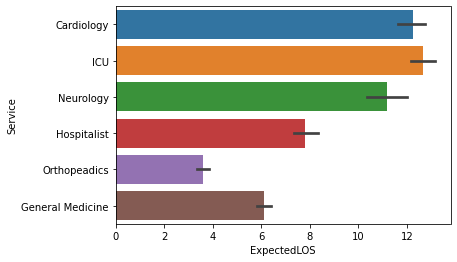

In [73]:
sn.barplot(x='ExpectedLOS',y='Service',  data=discharge_df )

#### Q56: Count of canceled status

In [74]:
status_count =Ambvisits_df [(Ambvisits_df .VisitStatus=='Canceled')]
status_count.VisitStatus.count()

60

#### Q57 : Find the age prone to get stroke
 people above age 60 are more prone to get a stroke

In [75]:
agegroup_data = stroke_data.groupby(by = ['AgeGroup']).count()
agegroup_data.drop(['PatientID','DateOfBirth','Gender','Race','AdmissionDate','Age'],axis = 1)

,year,no_readmit,PrimaryDiagnosis
AgeGroup,,,
above 30,10,10,10
above 40,12,12,12
above 50,22,22,22
above 60,24,24,24


In [76]:
print("The age prone to get stroke is :")
print(agegroup_data.idxmax().loc[agegroup_data.max().idxmax()])

The age prone to get stroke is :
above 60


#### Q58 : Display total count of patients service wise based on gender

In [77]:
df = patients_df
df1 = readmit_df 
patients_count = pd.merge(df1, df, on = 'PatientID')
total_count = patients_count.groupby(['Service','Gender']).count()
total_count['PatientID']

Service           Gender
Cardiology        Female     41
                  Male       54
General Medicine  Female    114
                  Male      149
Hospitalist       Female     35
                  Male       66
ICU               Female     65
                  Male       86
Neurology         Female     34
                  Male       31
Orthopeadics      Female     22
                  Male       23
Name: PatientID, dtype: int64

#### Q59 : Create a dataframe by splitting provider name to firstname and lastname with names for the columns

In [78]:
pname = pd.DataFrame()
pname[['firstname','lastname']]= provider_df.ProviderName.str.split(' ',expand=True)
print(pname)

    firstname  lastname
0       Sally       Sue
1        Mike     Myers
2      Jordan   Michael
3         Ted     Texas
4         Ala      Bama
5       Harry      Kane
6       Barry       Bar
7         Ted     Green
8         Ted     Black
9        Fred       Man
10        Kim  Kimberly
11      Sarah        Ab
12    Abigail   Marriot
13       Dave        Yu
14  Christian     Saint
15      Perry    Pardon
16       Kent   Kendall
17       Ryan     Kevin
18      Tyler    Conner
19     Bailey    Barret
20      Megan     Bonco
21     Joesph    Walter
22     Walter      King
23       Luke      Long
24     Justin      Time
25       Mike    Joseph
26    Bridget    Brenda
27     Brenda      Bing
28   Chandler      Bing
29     Joesph      Ross
30     Dwight     Scott
31    Michael   Halpert
32     Pamela      Ding
33       Tony     Creed
34    Phyllis   Stanley
35      Holly       Hue
36      Trent       Tye
37   Kimberly      Cone
38      Harry      West
39      Rosie    Renter


#### Q60 : "Predict the output of the program..
#### class Acc: 
#### def __init__(self, id): 
#### self.id = id
#### id = 555 

#### acc = Acc(111) 
#### print(acc.id)
#### "
#### The above code gives indentation error.If it is indented as below it should give 111 as output.

In [79]:
class Acc: 
    def __init__(self, id): 
        self.id = id
        id = 555 

acc = Acc(111) 
print(acc.id)

111


####  Q61: Plot a graph by multiplotting on the same canvas . (Take any set of x & y values)

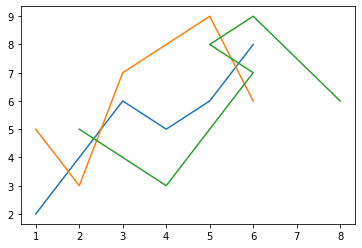

In [80]:
x = [1, 2, 3, 4, 5, 6]
y = [2, 4, 6, 5, 6, 8]
z = [5, 3, 7, 8, 9, 6]
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, z)
ax.plot(y, z)
plt.show()

#### Q62 : Display the data for all 'White Female' patients above the age of 50


In [81]:
patients_df.loc[(patients_df['Age'] > 50) & (patients_df['Race'] == 'White')&(patients_df['Gender']=='Female')].iloc[:,:-2]


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,54,Below 60
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,61,Below 70
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,61,Below 70
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56,Below 60
44,45,Barret,Doubrava,1962-10-18 08:23:23.478,Female,White,Spanish,59,Below 60
...,...,...,...,...,...,...,...,...,...
864,865,Giovanni,Borland,1960-12-01 13:16:18.100,Female,White,English,61,Below 70
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,51,Below 60
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55,Below 60
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,52,Below 60


#### Q63 : Using loc, retrieve the firstname and lastname of patients between indices 101 and 200


In [82]:
patients_df.loc[101:200, ['FirstName', 'LastName']]


,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


#### Q64."Using numpy functions, multiply the following arrays,a=np.arange(6).reshape(2,3),b=np.arange(6).reshape(3,2)"

In [83]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
#one way to multiply arrays
np.dot(a,b)
# another way to multiply arrays
np.matmul(a,b)

array([[10, 13],
       [28, 40]])

#### Q65 : Get the count of number of patients based on service and primary diagnosis


In [84]:
readmit_df[['PatientID','Service','PrimaryDiagnosis']].groupby(['Service','PrimaryDiagnosis']).count().rename(columns={'PatientID':'No. of Patients'})


No. of Patients
Service          PrimaryDiagnosis                   
Cardiology       AMI                              40
                 Afib                             10
                 Broken Leg                        3
                 Flu                               2
                 Heart Failure                    39
                 Kidney Failure                    1
General Medicine Broken Leg                        3
                 Diabetes                         38
                 Fever                            13
                 Flu                              54
                 Hypertension                     35
                 Kidney Failure                   12
                 Laceration                       21
                 Pneumonia                        67
                 Stroke                           20
Hospitalist      AMI                               1
                 Broken Leg                        3
                 Diabetes                         26
                 Fever                             3
                 Flu                              19
                 Hypertension                      6
                 Kidney Failure                    6
                 Knee Replacement                  1
                 Laceration                        7
                 Pneumonia                        28
                 Stroke                            1
ICU              AMI                               5
                 Afib                              1
                 Fever                             3
                 Flu                               3
                 Heart Failure                    33
                 Hypertension                      4
                 Kidney Failure                    1
                 Laceration                        1
                 Pneumonia                        77
                 Spinal Cord Injury                2
                 Stroke                           21
Neurology        AMI                               2
                 Flu                               2
                 Heart Failure                     6
                 Hypertension                      5
                 Migraine                         12
                 Pain                              7
                 Pneumonia                         5
                 Stroke                           26
Orthopeadics     Hip Fracture                     23
                 Knee Replacement                 22

#### Q66 : np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30 -->


In [85]:
arr = np.arange(1,31).reshape(6,5)

print(arr[0,3:5])
print(arr[4:6, 3:5])

[4 5]
[[24 25]
 [29 30]]


#### Q67 : Make a pivot table by counts the no. of patients from the admission date till discharge date


In [86]:
discharge_df['Dis_date'] = discharge_df['DischargeDate'].dt.strftime('%Y-%m-%d')
# discharge_df
tbl = pd.pivot_table(data=discharge_df, 
                        index=['AdmissionDate'], 
                        columns=['Dis_date'], 
                               aggfunc='count')
# since there were Nan values for few cells, replacing as Nan values with 0
tbl.fillna(0, inplace=True)
display(tbl)

AdmissionID                                              \
Dis_date       2018-01-04 2018-01-05 2018-01-06 2018-01-07 2018-01-08   
AdmissionDate                                                           
2018-01-01            3.0        2.0        1.0        3.0        1.0   
2018-01-02            0.0        1.0        0.0        1.0        1.0   
2018-01-03            0.0        0.0        0.0        0.0        1.0   
2018-01-04            0.0        0.0        0.0        1.0        2.0   
2018-01-05            0.0        0.0        0.0        0.0        0.0   
2018-01-06            0.0        0.0        0.0        0.0        0.0   
2018-01-07            0.0        0.0        0.0        0.0        0.0   
2018-01-08            0.0        0.0        0.0        0.0        0.0   
2018-01-09            0.0        0.0        0.0        0.0        0.0   
2018-01-10            0.0        0.0        0.0        0.0        0.0   
2018-01-11            0.0        0.0        0.0        0.0        0.0   
2018-01-12            0.0        0.0        0.0        0.0        0.0   
2018-01-13            0.0        0.0        0.0        0.0        0.0   
2018-01-14            0.0        0.0        0.0        0.0        0.0   
2018-01-15            0.0        0.0        0.0        0.0        0.0   
2018-01-16            0.0        0.0        0.0        0.0        0.0   
2018-01-17            0.0        0.0        0.0        0.0        0.0   
2018-01-18            0.0        0.0        0.0        0.0        0.0   
2018-01-19            0.0        0.0        0.0        0.0        0.0   
2018-01-20            0.0        0.0        0.0        0.0        0.0   
2018-01-21            0.0        0.0        0.0        0.0        0.0   
2018-01-22            0.0        0.0        0.0        0.0        0.0   
2018-01-23            0.0        0.0        0.0        0.0        0.0   
2018-01-24            0.0        0.0        0.0        0.0        0.0   
2018-01-25            0.0        0.0        0.0        0.0        0.0   
2018-01-26            0.0        0.0        0.0        0.0        0.0   
2018-01-27            0.0        0.0        0.0        0.0        0.0   
2018-01-28            0.0        0.0        0.0        0.0        0.0   
2018-01-29            0.0        0.0        0.0        0.0        0.0   
2018-01-30            0.0        0.0        0.0        0.0        0.0   
2018-01-31            0.0        0.0        0.0        0.0        0.0   
2018-02-01            0.0        0.0        0.0        0.0        0.0   
2018-02-02            0.0        0.0        0.0        0.0        0.0   
2018-02-03            0.0        0.0        0.0        0.0        0.0   
2018-02-04            0.0        0.0        0.0        0.0        0.0   
2018-02-05            0.0        0.0        0.0        0.0        0.0   
2018-02-06            0.0        0.0        0.0        0.0        0.0   
2018-02-07            0.0        0.0        0.0        0.0        0.0   
2018-02-08            0.0        0.0        0.0        0.0        0.0   
2018-02-09            0.0        0.0        0.0        0.0        0.0   
2018-02-10            0.0        0.0        0.0        0.0        0.0   
2018-02-11            0.0        0.0        0.0        0.0        0.0   
2018-02-12            0.0        0.0        0.0        0.0        0.0   
2018-02-13            0.0        0.0        0.0        0.0        0.0   
2018-02-14            0.0        0.0        0.0        0.0        0.0   
2018-02-15            0.0        0.0        0.0        0.0        0.0   
2018-02-16            0.0        0.0        0.0        0.0        0.0   
2018-02-17            0.0        0.0        0.0        0.0        0.0   
2018-02-18            0.0        0.0        0.0        0.0        0.0   
2018-02-19            0.0        0.0        0.0        0.0        0.0   
2018-02-20            0.0        0.0        0.0        0.0        0.0   
2018-02-21            0.0        0.0        0.0        0.0        0.0   

#### Q68 : Display the data where actual LOS is greater than expected LOS

In [87]:
los_data1 = discharge_df
los_data1['DischargeDate'] = los_data1['DischargeDate'].dt.strftime('%Y-%m-%d') #removing time from column
los_data1['DischargeDate'] =pd.to_datetime(los_data1['DischargeDate'])#changing to Admissiondate's format
los_data1['ActualLos'] = (los_data1['DischargeDate']-los_data1['AdmissionDate'])/timedelta(days =1)#calculating actual los
los_data1 = los_data1.where(los_data1['ActualLos']>los_data1['ExpectedLOS'])#extracting data where actual los > expectedlos
los_data1.dropna()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,Dis_date,ActualLos
1,257.0,93.0,2018-01-06,2018-01-18,0.0,Cardiology,2.0,6.816558,0.628827,2018-01-18,12.0
4,258.0,103.0,2018-01-07,2018-01-15,0.0,Cardiology,2.0,2.639297,0.055468,2018-01-15,8.0
5,395.0,109.0,2018-01-07,2018-01-22,0.0,Cardiology,5.0,2.981758,0.192976,2018-01-22,15.0
6,396.0,115.0,2018-01-08,2018-01-17,0.0,Cardiology,5.0,4.959098,0.254923,2018-01-17,9.0
7,259.0,116.0,2018-01-08,2018-01-20,0.0,Cardiology,2.0,2.279624,0.491274,2018-01-20,12.0
...,...,...,...,...,...,...,...,...,...,...,...
712,703.0,703.0,2018-02-21,2018-02-27,2.0,General Medicine,14.0,3.539165,0.275691,2018-02-27,6.0
713,709.0,708.0,2018-02-21,2018-03-01,2.0,General Medicine,3.0,4.518876,0.455570,2018-03-01,8.0
714,697.0,713.0,2018-02-21,2018-03-04,2.0,General Medicine,14.0,8.542970,0.201036,2018-03-04,11.0
715,715.0,716.0,2018-02-21,2018-03-06,2.0,ICU,6.0,11.362095,0.370695,2018-03-06,13.0


#### Q69: Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive

In [88]:
patients_df[patients_df['FirstName'].str.contains("lau") | patients_df['LastName'].str.contains("lau")] 

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup,year,no_readmit
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English,39,Below 40,1982,False
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English,53,Below 60,1969,True
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English,60,Below 70,1961,False
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English,56,Below 60,1965,False
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English,55,Below 60,1967,True
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English,52,Below 60,1970,True
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English,48,Below 50,1973,True
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English,42,Below 50,1979,True
910,911,Zulauf,Orbine,1973-06-26 03:13:50.449,Male,Black/African-American,English,48,Below 50,1973,True


#### Q70:Plot a graph to show the distribution of expected mortality

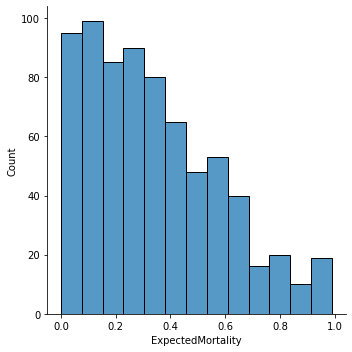

In [89]:
sn.displot(readmit_df['ExpectedMortality'])

#### Q71 :Create a visualization on the count the no. of patients based on primary diagnosis

array([<AxesSubplot:ylabel='PatientID'>], dtype=object)

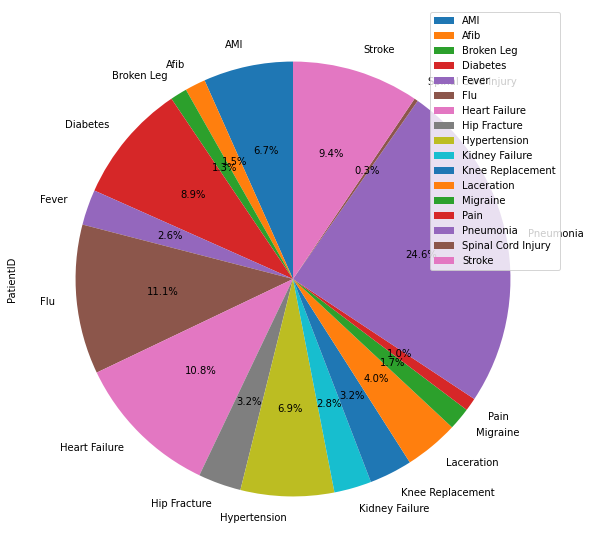

In [90]:
new_df = readmit_df
y = new_df[['PatientID','PrimaryDiagnosis']].groupby(['PrimaryDiagnosis']).count()
y.plot.pie(subplots = True,figsize = (10,10),autopct='%1.1f%%',startangle=90)

In [91]:
py.offline.init_notebook_mode(connected =True)

In [92]:
cf.go_offline()

In [93]:
y.iplot()
# can view the visualizations in interactive mode at the following link
#https://plot.ly/create/

#### Q 72: List male patients over the age of 60 who have undergone surgery from January-March 2019


In [94]:
#  patients_df.loc[readmit_df.query("PrimaryDiagnosis == 'Stroke'")['PatientID']]
pvdr_df = provider_df.loc[provider_df['ProviderSpecialty'] == 'Surgery']
# display(pvdr_df)
amb_df = Ambvisits_df.loc[Ambvisits_df['ProviderID'].isin(pvdr_df['ProviderID']) ]
amb_df = amb_df.assign(DateSch = amb_df['DateScheduled'].dt.strftime('%Y-%m-%d'))
# amb_df = amb_df.loc[amb_df.query("DateScheduled.dt.year == '2019'")["PatientMRN"]]
amb_df = amb_df.loc[(amb_df['DateSch'] >= '2019-01-01') & (amb_df['DateSch'] <= '2019-03-31')]
# display(amb_df)

pat_df = patients_df.loc[(patients_df['Age'] > 60) & (patients_df['Gender'] == 'Male')]
pat_df = pat_df.loc[pat_df['PatientID'].isin(amb_df['PatientMRN'])]
pat_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup,year,no_readmit
580,581,Constanta,Edgin,1960-06-06 08:19:25.534,Male,Black/African-American,English,61,Below 70,1960,False
801,802,Berta,Loxly,1961-05-19 21:00:01.885,Male,White,English,61,Below 70,1961,True


#### Q73:Delete the column 'DischargeDispostion' iteratively

In [95]:
discharge_data = discharge_df
for col in discharge_data.columns:
    if 'Disposition' in col:
        del discharge_data[col]
discharge_data

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,Dis_date,ActualLos
0,1,9,2018-01-01,2018-01-07,Cardiology,0,9.646857,0.061540,2018-01-07,6.0
1,257,93,2018-01-06,2018-01-18,Cardiology,2,6.816558,0.628827,2018-01-18,12.0
2,152,101,2018-01-07,2018-01-11,Cardiology,9,6.580273,0.573887,2018-01-11,4.0
3,361,102,2018-01-07,2018-01-15,Cardiology,1,12.794536,0.222163,2018-01-15,8.0
4,258,103,2018-01-07,2018-01-15,Cardiology,2,2.639297,0.055468,2018-01-15,8.0
...,...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,ICU,6,11.362095,0.370695,2018-03-06,13.0
716,698,723,2018-02-22,2018-02-26,ICU,6,10.262312,0.812930,2018-02-26,4.0
717,704,724,2018-02-22,2018-02-27,General Medicine,14,6.036234,0.094128,2018-02-27,5.0
718,716,733,2018-02-22,2018-03-05,ICU,6,13.323413,0.490892,2018-03-05,11.0


#### Q74 : Get the list of ReasonForVisit

In [96]:
edunique_df['ReasonForVisit'].unique()

array(['Stomach Ache', 'Migraine', 'Chest Pain', 'Bleeding',
       'Car Accident', 'Pneumonia', 'Fever', 'Shortness of Breath',
       'Gun Shot', 'Accident', 'Intoxication', 'Laceration'], dtype=object)

#### Q75.Calculate the time spent in ED Department for each visit

In [97]:
timespent_df = visits_df
timespent_df['time'] = visits_df['EDDischargeTime']-visits_df['VisitDate'] 
timespent_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,time
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,0 days 11:20:22.924000
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,0 days 23:14:20.215000
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,0 days 01:50:56.151000
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,0 days 01:20:09.793000
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,0 days 02:38:20.043000
...,...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged,0 days 15:53:09.453000
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged,0 days 22:27:04.030000
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged,0 days 04:30:03.545000
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged,0 days 06:10:35.054000


#### Q76 :Reverse the string without using inbuilt functions

In [98]:
# Function to reverse the string
def reverse(string):
    string = string[::-1]
    return string
  
s = "Numpy Ninja Hackathon"  
print ("The original string is : ", s)
print ("The reversed string is : ", reverse(s))

The original string is :  Numpy Ninja Hackathon
The reversed string is :  nohtakcaH ajniN ypmuN


In [99]:
# other way to reverse string
s = "Numpy Ninja Hackathon" 
print ("The reversed string is : ", s[::-1])

The reversed string is :  nohtakcaH ajniN ypmuN


#### Q77 : Create a bar chart by making sets on Acuity & EDDischarge column & make the hatchs onto the bar by using set_hatch() method


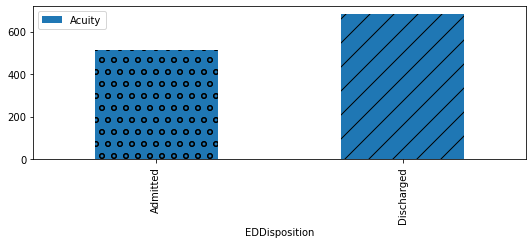

In [100]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = visits_df[['Acuity', 'EDDisposition']].groupby(['EDDisposition']).count()
ax = plt.figure().add_subplot(111)
bars = df.plot(ax=ax, kind='bar')
hatches = ["*", "/", "o", "x"]

for patch in bars.patches:
    patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])

plt.show()

#### Q78:Find reasonForVisit with highest count of acuity 5 patients

In [101]:
max_count = visits_df [(visits_df .Acuity==5)]
print('The reason for visit with highest count of acuity 5 patients is ',max_count.ReasonForVisit.max())

The reason for visit with highest count of acuity 5 patients is  Shortness of Breath


#### Q 79 : Which Primary Diagnosis has the biggest difference between maximum and minimum Expected LOS?


In [102]:
diff_df1 = pd.DataFrame(discharge_df.groupby('PrimaryDiagnosis')['ExpectedLOS'].max() )
diff_df2  = pd.DataFrame(discharge_df.groupby('PrimaryDiagnosis')['ExpectedLOS'].min() )
diff_df = diff_df1.merge(diff_df2, how = 'inner', on = ['PrimaryDiagnosis'])
# diff_df['LOS_diff'] = 
big_diff = abs(diff_df['ExpectedLOS_x'] - diff_df['ExpectedLOS_y']).idxmax()
print('Primary Diagnosis that has the biggest difference between maximum and minimum Expected LOS is :')
display(big_diff)

Primary Diagnosis that has the biggest difference between maximum and minimum Expected LOS is :


14

#### Q80:Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups)

In [103]:
df6 = provider_df
df6.groupby(['ProviderSpecialty']).count()

,ProviderID,ProviderName,ProviderDateOnStaff
ProviderSpecialty,,,
Cardiology,8,8,8
Pediatrics,9,9,9
PrimaryCare,16,16,16
Surgery,7,7,7


#### Q81:Display full name of patients

In [104]:
patients_df ["FirstName"] +' ' + patients_df ["LastName"]

0             Lanni Sue
1             Far Myers
2       Devlin  Michael
3         Carmine Texas
4            Tann  Bama
             ...       
940         Wat Fideler
941     Wandie Baythrop
942     Diahann Smeeton
943    Panchito Sharple
944        Walsh Calvie
Length: 945, dtype: object

#### Q82 : Retrieve the rows where SBP<140 and DBP<80


In [105]:
df5=Ambvisits_df [(Ambvisits_df .BloodPressureSystolic <140) &(Ambvisits_df.BloodPressureDiastolic <80)]
df5

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,2019-03-13,2019-02-28 10:28:01.091,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,2019-03-16,2019-02-26 17:42:39.779,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,2019-01-21,2019-01-07 06:04:17.575,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,2019-03-19,2019-03-03 11:39:03.145,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,2019-03-20,2019-03-10 07:34:56.766,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2019-02-22,2019-02-04 06:53:41.987,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,2019-03-25,2019-02-26 09:48:42.832,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2019-02-05,2019-01-10 05:43:34.544,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2019-02-10,2019-02-02 20:49:56.868,2,Physical,121.0,64.896818,68.496869,Canceled


#### Q83: Create the plot below by adding two axes to a figure object at [0.1,0.1,0.9,0.9] & [0.2,0.6,0.3,0.3]


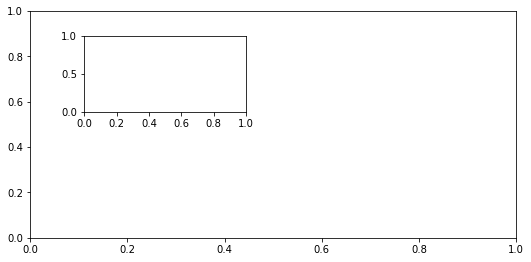

In [110]:
# Creating an empty object
fig = plt.figure()
 
# Creation of multiple axes
# main axes
axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) 
 
# secondary axes
axes2 = fig.add_axes([0.2, 0.6, 0.3, 0.3]) 

#### Q84 : Find the list of patients whose ExpectedLOS is greater than the value given by the user


In [107]:
value  = int(input("Please enter a number: "))
patients_df.loc[readmit_df.query("ExpectedLOS > @value")['PatientID']]


Please enter a number: 10


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup,year,no_readmit
6,7,Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English,46,Below 50,1975,False
8,9,Devlin,Black,1974-09-24 23:43:46.185,Male,White,English,47,Below 50,1974,False
10,11,Dean,Kimberly,1972-02-22 19:23:49.981,Male,White,Spanish,50,Below 60,1972,False
11,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish,59,Below 60,1963,False
14,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish,60,Below 70,1961,False
...,...,...,...,...,...,...,...,...,...,...,...
731,732,Franecki,LLC,1980-09-14 23:49:46.321,Male,White,English,41,Below 50,1980,False
733,734,Yvette,Inc,1986-11-23 02:32:12.587,Female,White,English,35,Below 40,1986,False
737,738,Konopelski,Group,1975-11-28 02:34:22.237,Female,White,English,46,Below 50,1975,False
738,739,Chandal,Group,1985-04-19 17:45:10.810,Female,White,English,37,Below 40,1985,False


#### Q85:Find count of Black/African American, English Females

In [108]:
print("The count of Black/African American, English Females is ",len(patients_df.loc[(patients_df['Language'] == 'English') & 
                                                        (patients_df['Gender'] == 'Female') & 
                                                        (patients_df['Race']== 'Black/African-American')]))

The count of Black/African American, English Females is  119
